**Perkenalan**

In [104]:
#Nama       : Gde Ondy Janesawara
#Batch      : 10
#Objective  : Mengetahui generasi dengan Attack pokemon tertinggi

**Pustaka**

In [105]:
#import library
import numpy as np
import pandas as pd

**Data Loading**

In [106]:
#import data dan deklarasi
pokdf = pd.read_csv('Pokemon.csv')

In [107]:
#banyak data dari Pokemon.csv
len(pokdf)

800

In [108]:
#bentuk data
pokdf.shape

(800, 13)

In [109]:
#melihat 5baris pertama dari Pokemon.csv
pokdf.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Data Cleaning**

In [110]:
#Rename kolom Sp. Atk dan Sp. Def
pokdf.rename(columns = {'Sp. Atk' : 'S Atk', 'Sp. Def' : 'S Def'}, inplace = True)

In [111]:
#cek apakah missing values
pokdf.isnull().values.any()

True

In [112]:
#jumlah missing value di kolom Type 2 dengan Normal
pokdf.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
S Atk           0
S Def           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [113]:
#isi missing value
pokdf['Type 2'].fillna('Normal', inplace = True)

In [114]:
#hapus kolom Legendary
pokdf.drop(columns = ['Legendary'], inplace = True)

In [115]:
pokdf.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,S Atk,S Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,Normal,309,39,52,43,60,50,65,1


**Explorasi Data**

In [116]:
#query data Attack >75 dan S Atk > 75
pokdf[ (pokdf['Attack'] >75) & (pokdf['S Atk'] > 75 )]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,S Atk,S Def,Speed,Generation
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


In [117]:
#query data Type Water dan Name akhiran le
pokdf[ (pokdf['Type 1'] == 'Water') & (pokdf['Name'].str.endswith('le'))]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,S Atk,S Def,Speed,Generation
9,7,Squirtle,Water,Normal,314,44,48,65,50,64,43,1
10,8,Wartortle,Water,Normal,405,59,63,80,65,80,58,1
172,158,Totodile,Water,Normal,314,50,65,64,44,48,43,2
595,535,Tympole,Water,Normal,294,50,50,40,50,40,64,5


In [118]:
#query data Speed > 75 dan dari Generation 6
pokdf[ (pokdf['Speed'] > 75) & (pokdf['Generation'] == 6)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,S Atk,S Def,Speed,Generation
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6
725,657,Frogadier,Water,Normal,405,54,63,52,83,56,97,6
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6
728,660,Diggersby,Normal,Ground,423,85,56,77,50,77,78,6
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6
744,676,Furfrou,Normal,Normal,472,75,80,60,65,90,102,6
746,678,MeowsticMale,Psychic,Normal,466,74,48,76,83,81,104,6


In [119]:
#Grouping nilai Attack rata-rata
pokdf.groupby('Generation')['Attack'].mean()

Generation
1    76.638554
2    72.028302
3    81.625000
4    82.867769
5    82.066667
6    75.804878
Name: Attack, dtype: float64

In [120]:
#Grouping Pokemon dari Generation 3 dengan Attack > 100 dan S Atk > 100
pokdf[ 
    (pokdf['Generation'] == 3) & 
    (pokdf['Attack'] > 100)
].groupby(['Name', 'S Atk'])['Attack'].sum()

Name                     S Atk
Absol                    75       130
AbsolMega Absol          115      150
Aggron                   60       110
AggronMega Aggron        60       140
AltariaMega Altaria      110      110
Armaldo                  70       125
Banette                  83       115
BanetteMega Banette      93       165
Blaziken                 110      120
BlazikenMega Blaziken    130      160
Breloom                  60       130
Cacturne                 115      115
CameruptMega Camerupt    145      120
Crawdaunt                90       120
DeoxysAttack Forme       180      180
DeoxysNormal Forme       150      150
GlalieMega Glalie        120      120
Groudon                  100      150
GroudonPrimal Groudon    150      180
Hariyama                 40       120
Huntail                  94       104
KyogrePrimal Kyogre      180      150
LatiosMega Latios        160      130
MawileMega Mawile        55       105
Metagross                95       135
MetagrossMega Metag

In [121]:
#Grouping Attack > 150 dan Type Dragon
pokdf[ 
    (pokdf['Attack'] > 150) &
    (pokdf['Type 1'] == 'Dragon')
].groupby(['Name', 'Total']).sum()

,,#,HP,Attack,Defense,S Atk,S Def,Speed,Generation
Name,Total,,,,,,,,
GarchompMega Garchomp,700,445,108,170,115,120,95,92,4
KyuremBlack Kyurem,700,646,125,170,100,120,90,95,5
RayquazaMega Rayquaza,780,384,105,180,100,180,100,115,3


<AxesSubplot:xlabel='Generation'>

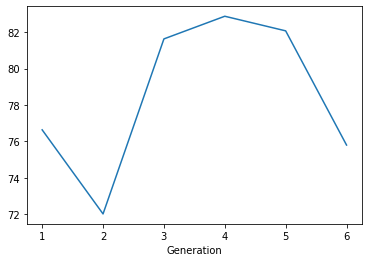

In [122]:
#Plot nilai rata-rata Attack tiap Generation
pokdf.groupby('Generation')['Attack'].mean().plot()

<AxesSubplot:xlabel='#'>

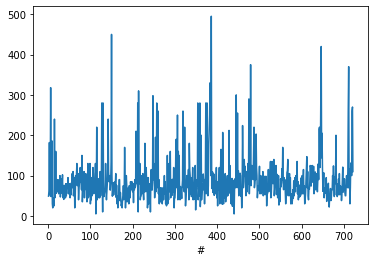

In [123]:
#Plot Attack berdasarkan #
pokdf.groupby('#')['Attack'].sum().plot()

<AxesSubplot:xlabel='Generation'>

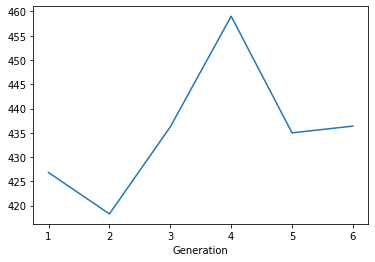

In [124]:
#Plot Total berdasarkan Generation
pokdf.groupby('Generation')['Total'].mean().plot()

**Pengambilan Kesimpulan**

In [125]:
#Berdasarkan data Pokemon.csv dan plot diatas maka bisa disimpulan bahwa Generation ke 4 memiliki Attack tertinggi